# **Credit Card Fraud Detection**

Creation of a system to classify anonymized credit card transactions as fraudulent or genuine

Source: https://www.kaggle.com/mlg-ulb/creditcardfraud

        
# **1. Loading Libraries and Data**

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# **Data Dictionary**

- Time:

Seconds difference between a transaction and the first one in the dataset;

- V1 - V28:

Not informed. May be the result from a Principal Component Analysis (PCA);

- Amount:

Transaction amount;

- Class:

Target:

    1: Fraudulent;
    0: Genuine;



In [8]:
data = pd.read_csv('creditcard.csv')

data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

There aren't null values.

# **2. Data Visualization**

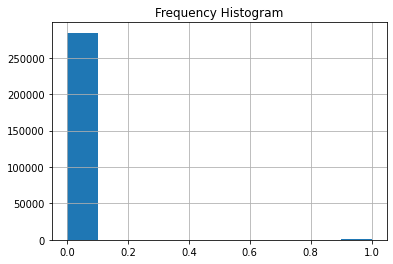

Total:  284807
Fraudulent:  492  ou  0.1727485630620034 %
Genuine:  284315  ou  99.827251436938 %


In [10]:
plt.hist(data['Class'])
plt.grid()
plt.title('Frequency Histogram')
plt.show()

print('Total: ', len(data))
print('Fraudulent: ', len(data[data['Class']==1]), ' ou ', len(data[data['Class']==1])*100/len(data),'%' )
print('Genuine: ', len(data[data['Class']==0]), ' ou ', len(data[data['Class']==0])*100/len(data),'%' )

The dataset is imbalanced. We'll deal with this problem soon.

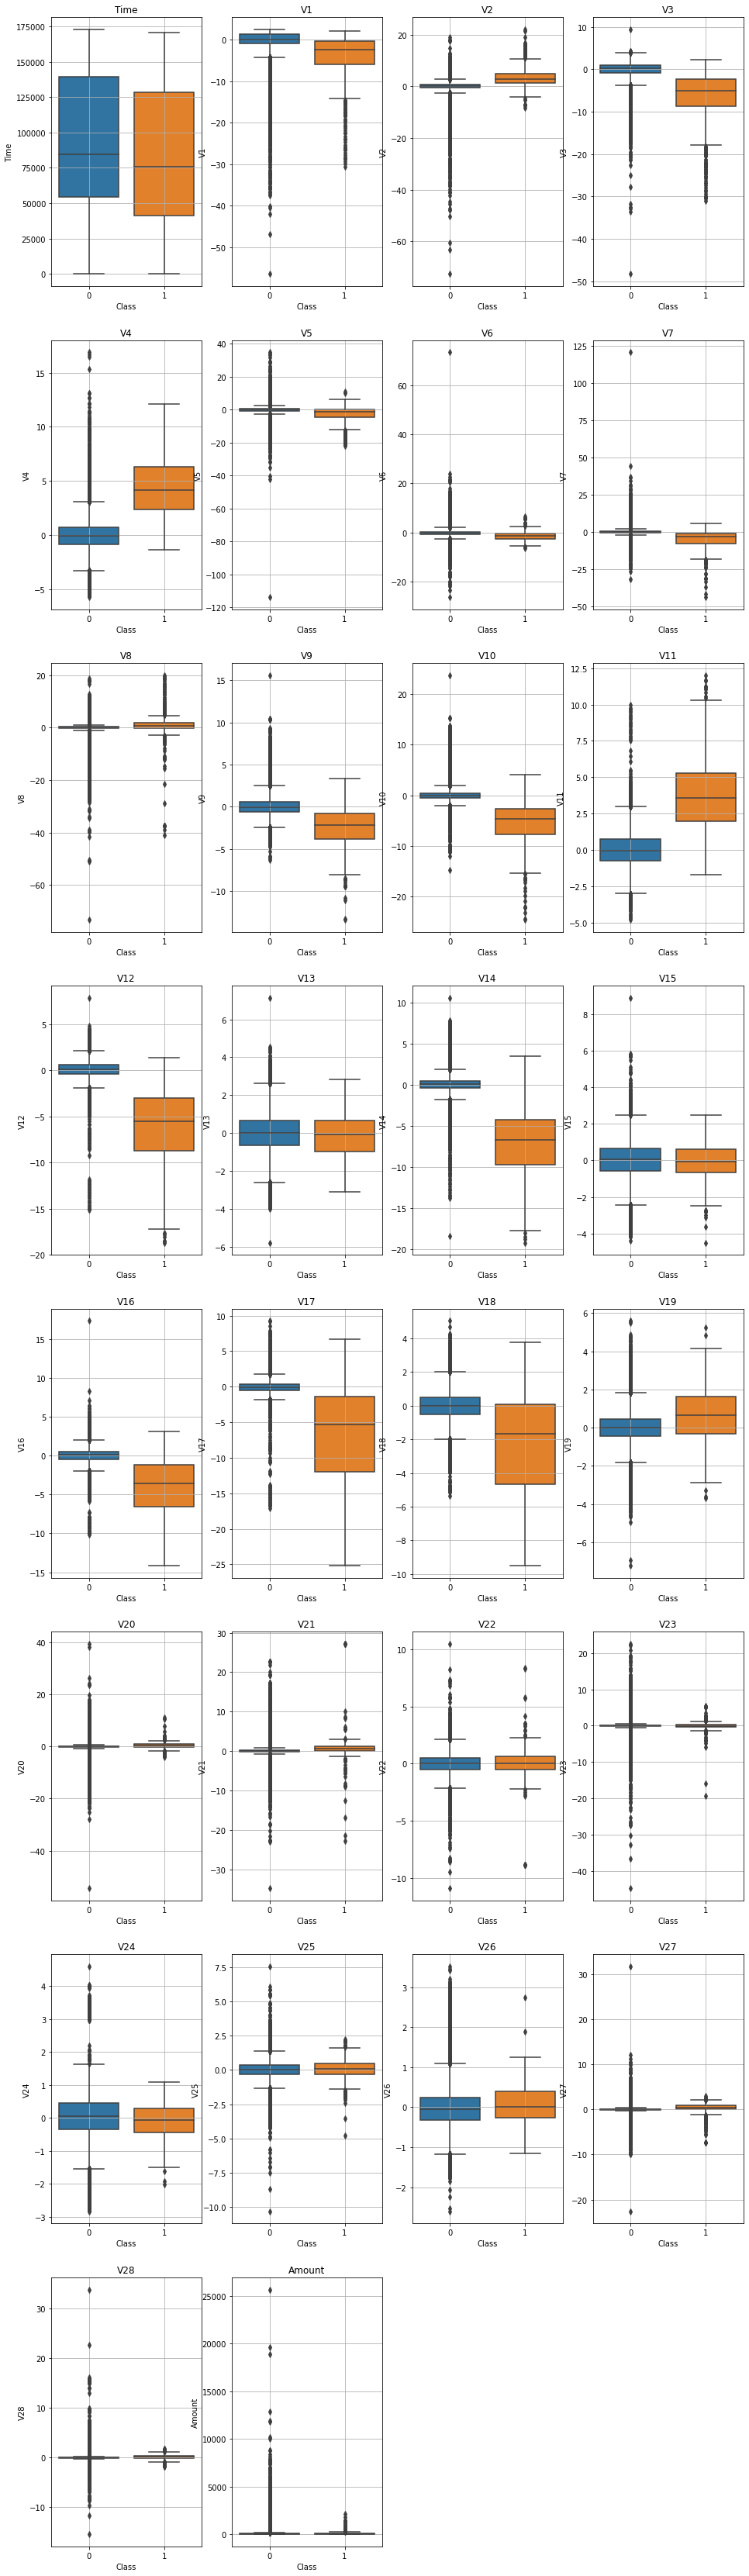

In [11]:
def box_plot(feature):

    sns.boxplot(x='Class',y=feature,data=data)
    plt.title(feature)
    plt.grid()
    
fig = plt.figure(figsize=(16,60))


for i in range(0,len(data.columns)-1):
    
    plt.subplot(8,4,i+1)
    box_plot(data.columns[i])

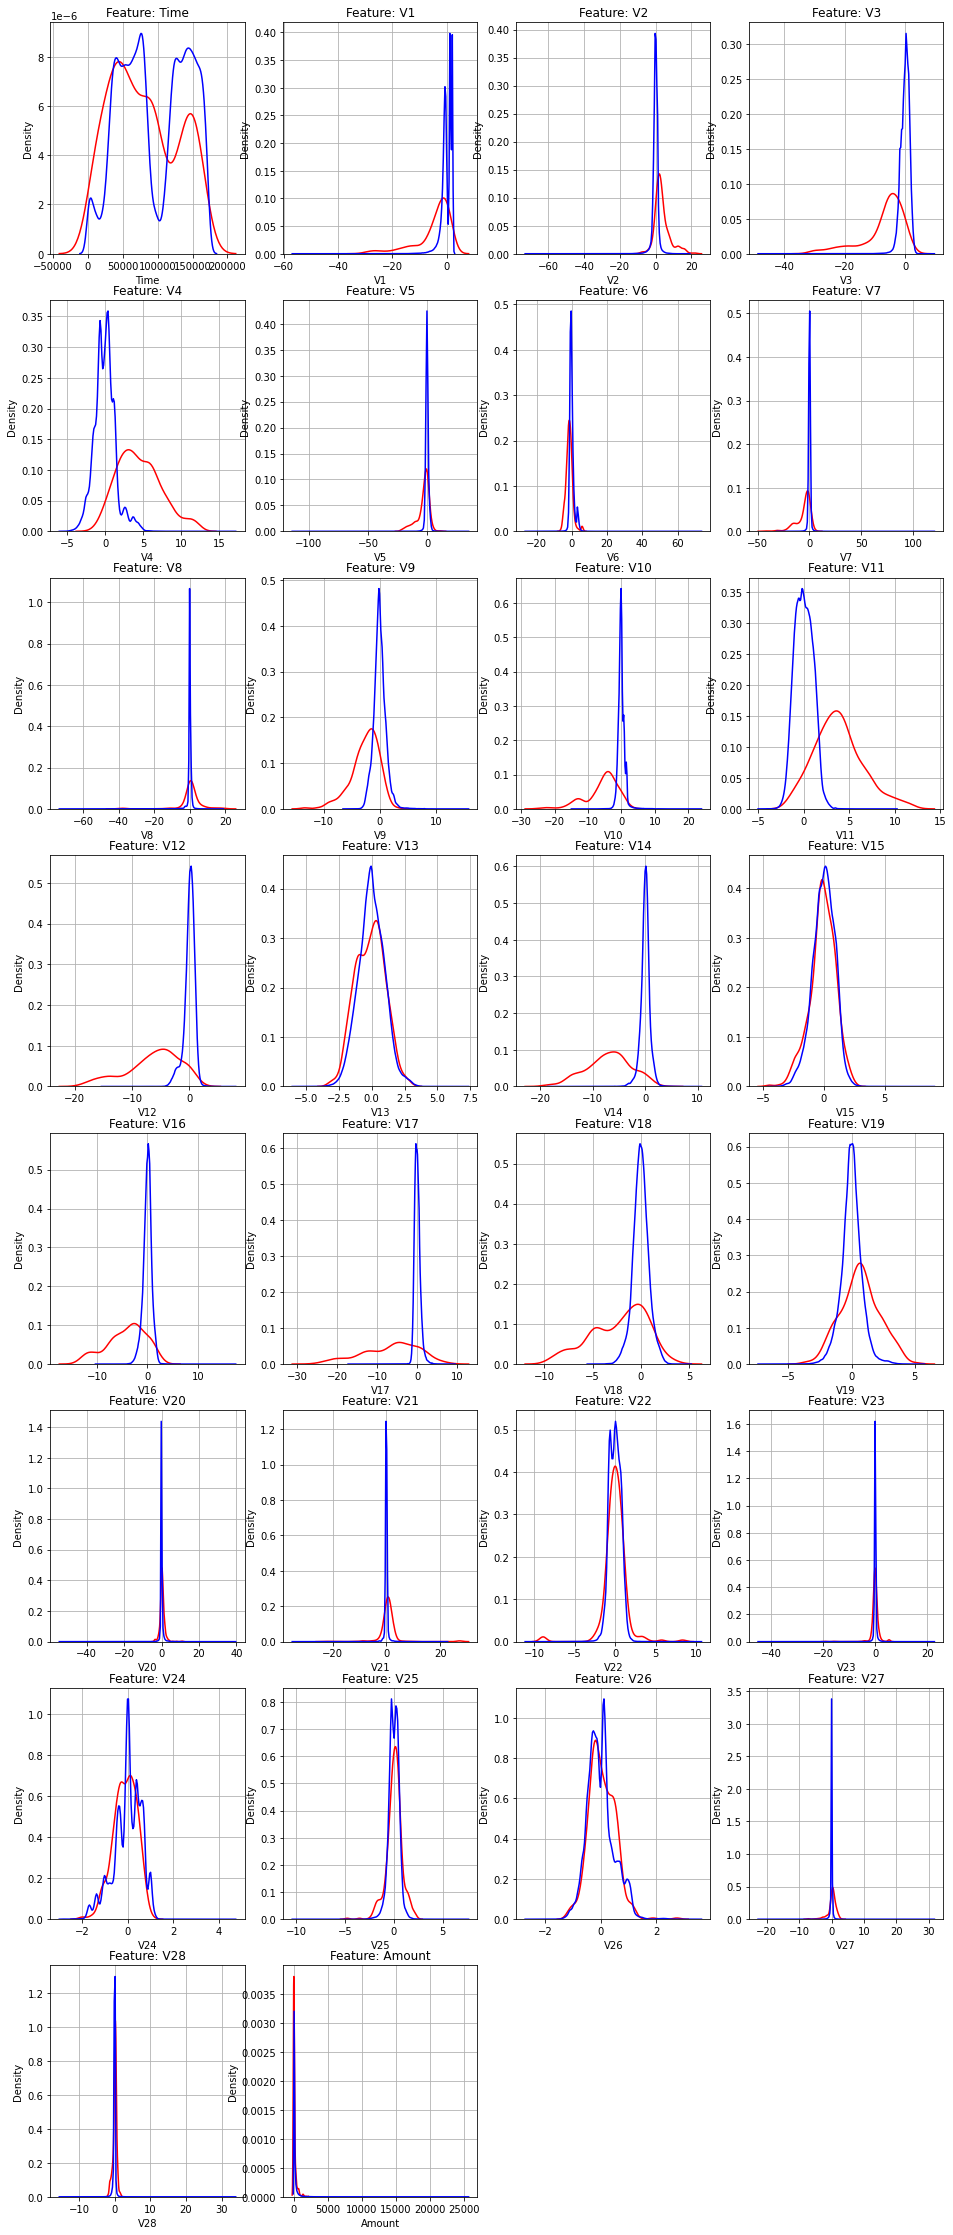

In [12]:
def kde_plot(feature):
    sns.kdeplot(data[feature][data['Class']==1], label='Fraudulent', color='red')
    sns.kdeplot(data[feature][data['Class']==0], label='Genuine', color='blue')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.title(f'Feature: {feature}')
    plt.grid()

fig = plt.figure(figsize=(16,40))

for i in range(len(data.columns)-1):
    plt.subplot(8,4,i+1)
    kde_plot(data.columns[i])

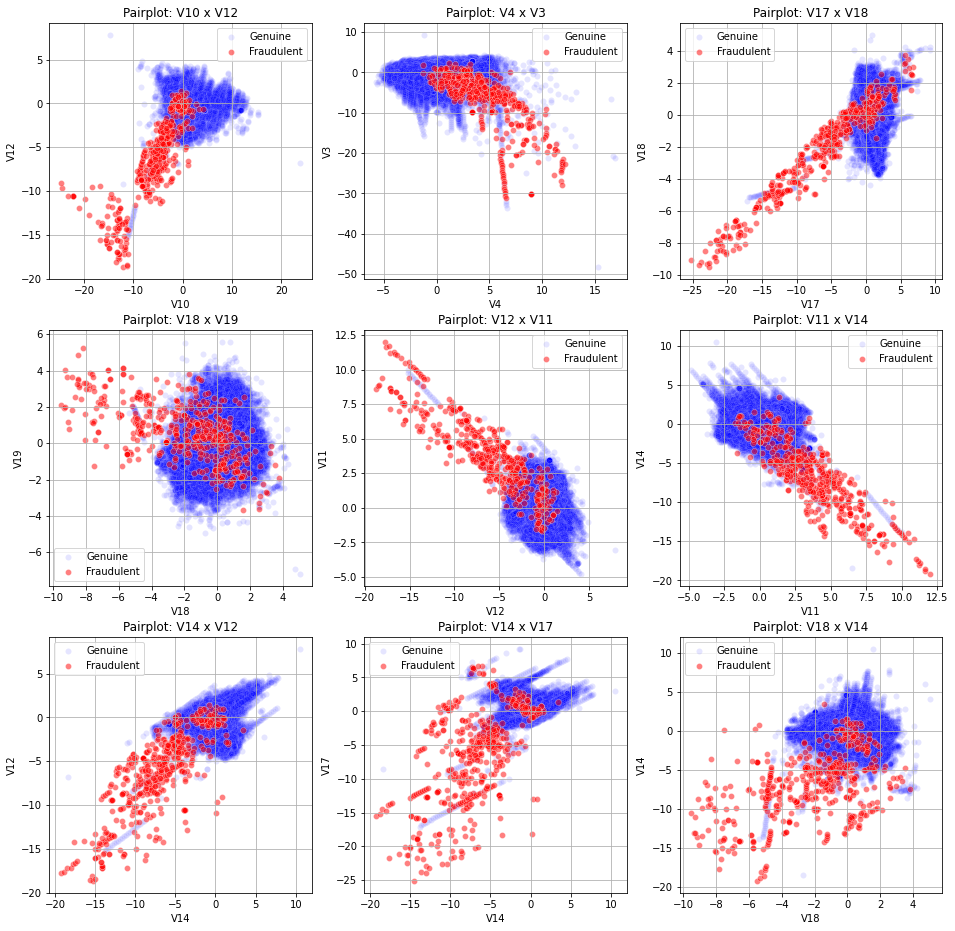

In [13]:
def scatter_plot(data, feature_1, feature_2):

    sns.scatterplot(data=data[data['Class']==0], x=feature_1, y=feature_2, alpha=0.1, color='blue', label='Genuine')
    sns.scatterplot(data=data[data['Class']==1], x=feature_1, y=feature_2, alpha=0.5, color='red', label='Fraudulent')
    plt.title(f'Pairplot: {feature_1} x {feature_2}')
    plt.xlabel(feature_1)
    plt.ylabel(feature_2)
    plt.grid()
    plt.legend()


plt.figure(figsize=(16,16))

plt.subplot(3,3,1)
scatter_plot(data, 'V10', 'V12')

plt.subplot(3,3,2)
scatter_plot(data, 'V4', 'V3')

plt.subplot(3,3,3)
scatter_plot(data, 'V17', 'V18')

plt.subplot(3,3,4)
scatter_plot(data, 'V18', 'V19')

plt.subplot(3,3,5)
scatter_plot(data, 'V12', 'V11')

plt.subplot(3,3,6)
scatter_plot(data, 'V11', 'V14')

plt.subplot(3,3,7)
scatter_plot(data, 'V14', 'V12')

plt.subplot(3,3,8)
scatter_plot(data, 'V14', 'V17')

plt.subplot(3,3,9)
scatter_plot(data, 'V18', 'V14')


In [14]:
def clip_outliers(data_):

    '''
    Use IQR method to identify outliers and then replace it using the quantile 0.01 and 0.99.
    '''

    data = data_.copy()

    for col in data.columns:

        if col != 'Class':
            
            Q1 = data[col].quantile(0.25)
            Q3 = data[col].quantile(0.75)
            Q01 = data[col].quantile(0.01)
            Q99 = data[col].quantile(0.99)
            IQR = Q3-Q1

            data[col][data[col] > Q3+1.5*IQR] = [Q99]
            data[col][data[col] < Q1-1.5*IQR] = [Q01]

    return data

data_2 = clip_outliers(data)

data_2.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,1.508703,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1017.97,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


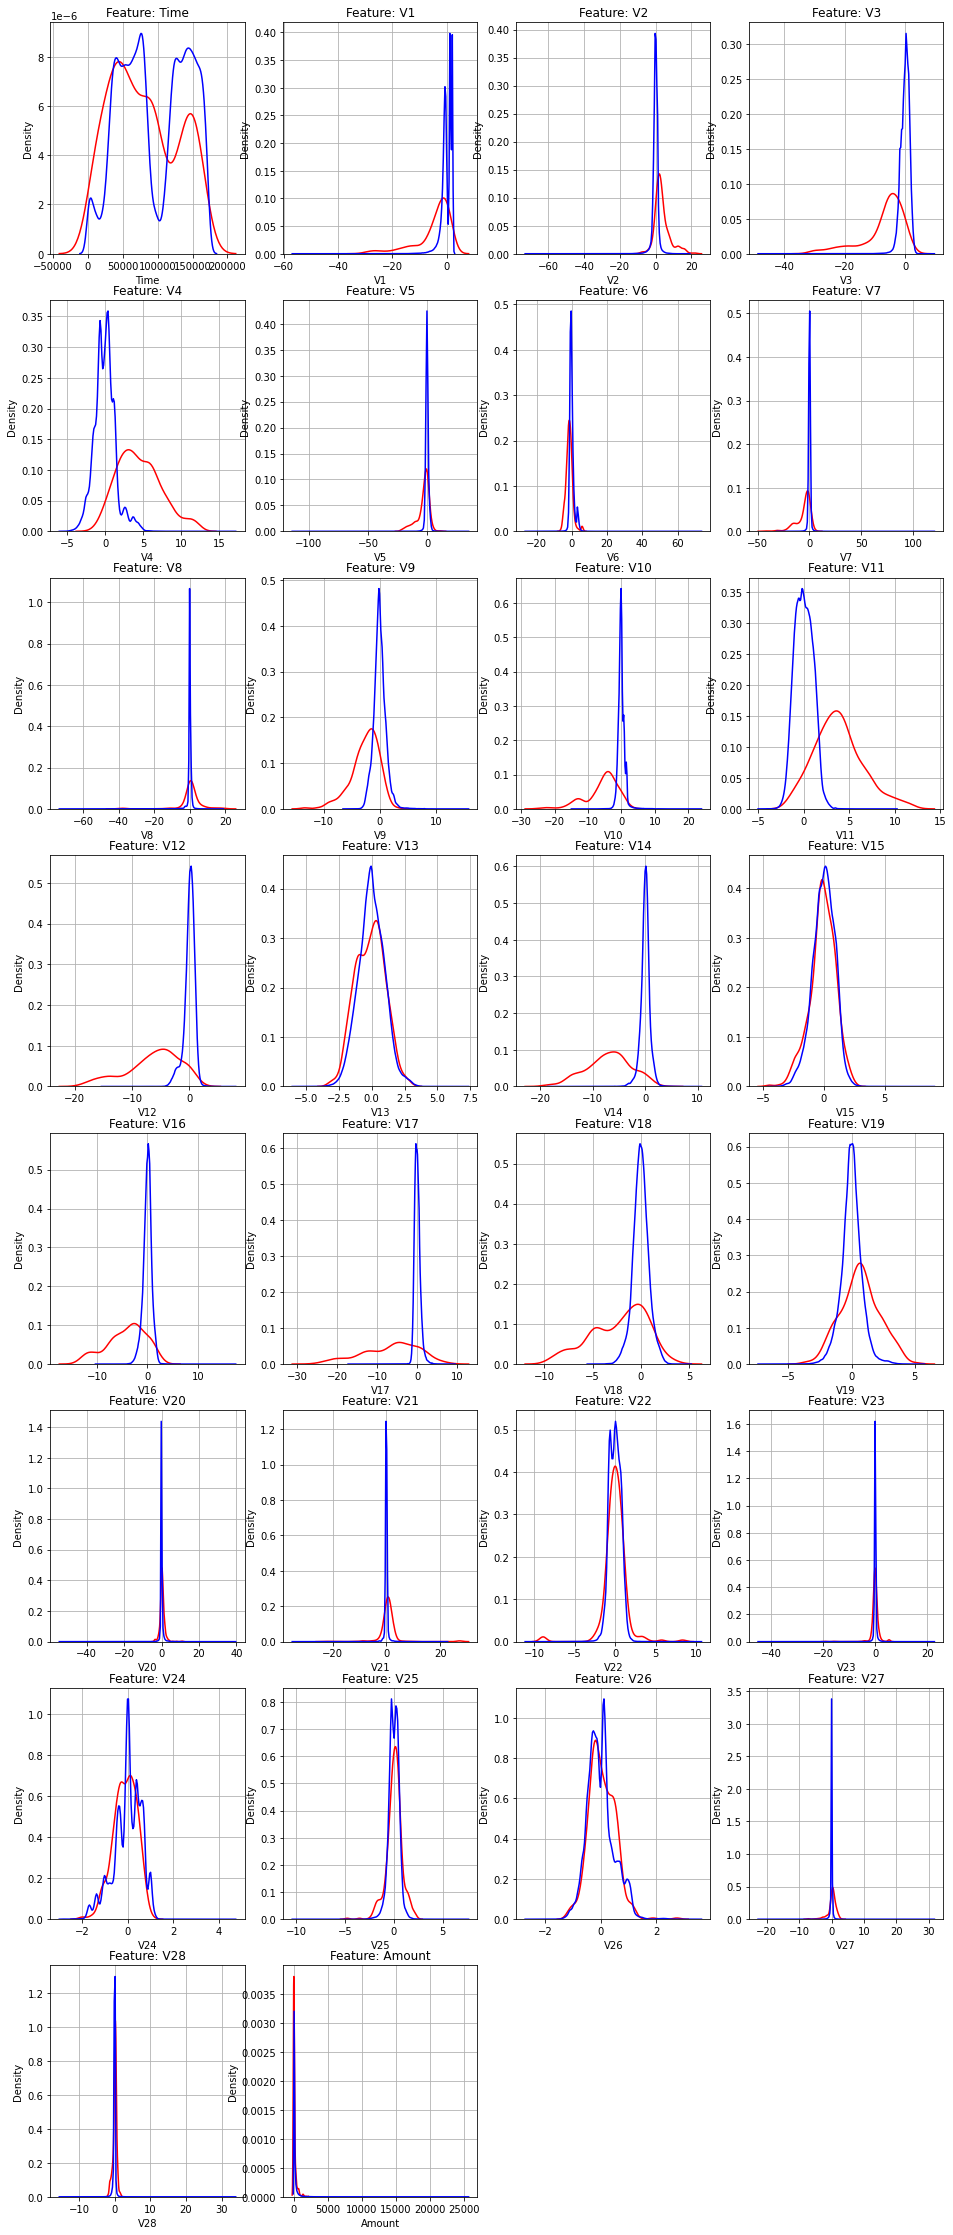

In [15]:
fig = plt.figure(figsize=(16,40))

for i in range(len(data.columns)-1):
    plt.subplot(8,4,i+1)
    kde_plot(data_2.columns[i])

# **3. Preprocessing**


In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split

X = data.iloc[:,:-1]

y = data.iloc[:,-1]

class OutlierCap(BaseEstimator, TransformerMixin):

    '''
    
    Use IQR method to identify outliers and then replace it using the quantile 0.01 and 0.99.
    
    '''
    
    def __init__(self, amplitude=1.5):

        self.amplitude = amplitude

        
    def fit(self, X, y=None):

        d = {}

        for feature in X.columns:

            d[feature] = [X[feature].quantile(0.75), X[feature].quantile(0.25), X[feature].quantile(0.75) - X[feature].quantile(0.25), X[feature].quantile(0.01), X[feature].quantile(0.99)]

        self.d = d

        return self


    def transform(self, X):

        X_ = X.copy()

        for feature in X.columns:

            X_[feature][X_[feature]>self.d[feature][0] + self.amplitude*self.d[feature][2]] = self.d[feature][4]
            
            X_[feature][X_[feature]>self.d[feature][1] - self.amplitude*self.d[feature][2]] = self.d[feature][3] 
    

        return X_


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 13, stratify = y)

from sklearn.pipeline import Pipeline

preprocessing_pipeline = Pipeline([('OutlierCap', OutlierCap(1.5)), ('StandardScaler', StandardScaler())])

X_train_ = preprocessing_pipeline.fit_transform(X_train)

X_test_ = preprocessing_pipeline.transform(X_test)



# **4. Machine Learning**

# **4.1 Bayesian Optimization**

In [ ]:
from sklearn.model_selection import StratifiedKFold
from skopt import gp_minimize
from skopt.space import Real, Categorical, Integer
from xgboost import XGBClassifier
from sklearn.metrics import f1_score

def optimizer(parameters):

    learning_rate = parameters[0]
    max_depth = parameters[1]
    n_estimators = parameters[2]
    scale_pos_weight = parameters[3]
    colsample_bynode = parameters[4]
    
    model = XGBClassifier(learning_rate=learning_rate, 
                        max_depth=max_depth, 
                        n_estimators=n_estimators, 
                        scale_pos_weight=scale_pos_weight,
                        colsample_bynode=colsample_bynode,                  
                        objective = 'binary:logistic',
                        tree_method='approx'
                        )

    model.fit(X_train_, y_train)

    y_predicted = model.predict(X_test_)

    return -f1_score(y_predicted, y_test, average='macro')


space =  [  
            Real(0.01, 1.0, 'log-uniform'),
            Integer(5, 50,'uniform'),
            Integer(50, 1000, 'uniform'),
            Real(1e-6, 500, 'log-uniform'),
            Real(0.01, 1.0, 'uniform')

            ]    

results = gp_minimize(optimizer, space, random_state=13, verbose=1, n_calls=32, n_random_starts=10)

<AxesSubplot:title={'center':'Convergence plot'}, xlabel='Number of calls $n$', ylabel='$\\min f(x)$ after $n$ calls'>

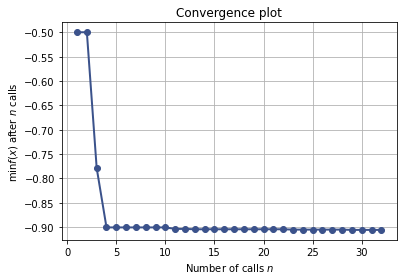

In [ ]:
from skopt.plots import plot_convergence

plot_convergence(results)

In [ ]:
parameters = results.x

learning_rate = parameters[0]
max_depth = parameters[1]
n_estimators = parameters[2]
scale_pos_weight = parameters[3]
colsample_bynode = parameters[4]
    
model = XGBClassifier(learning_rate=learning_rate, 
                        max_depth=max_depth, 
                        n_estimators=n_estimators, 
                        scale_pos_weight=scale_pos_weight,
                        colsample_bynode=colsample_bynode,                  
                        objective = 'binary:logistic',
                        tree_method='approx'
                        )

model.fit(X_train_, y_train)

y_predicted = model.predict(X_test_)

from sklearn.metrics import classification_report


In [ ]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.89      0.74      0.81       148

    accuracy                           1.00     85443
   macro avg       0.95      0.87      0.91     85443
weighted avg       1.00      1.00      1.00     85443



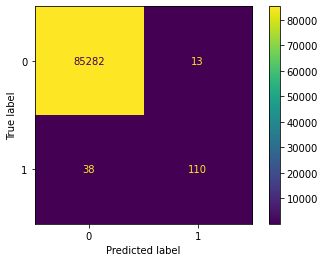

In [ ]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model,X_test_,y_test)

In [ ]:
import joblib
joblib.dump('xgboost.pkl')
joblib.dump(preprocessing_pipeline, 'pp_pipeline.pkl') 

# Testing the API Locally

API built using FastAPI. File: api.py

In [19]:
transaction = X_test_[y_test==1][0]

d = {}

i=0

for name in X_test.columns:

    d[name] = transaction[i]
    i+=1

print(d)

{'Time': 1.0, 'V1': 0.0273838883605935, 'V2': 0.016902481917859823, 'V3': -2.342032977747071, 'V4': 0.07240077747878129, 'V5': 0.04902624925672375, 'V6': 0.05075473420625304, 'V7': 0.05068496125224065, 'V8': -0.03606530390499188, 'V9': 0.04603063978877645, 'V10': -4.0614799259222325, 'V11': 0.01990771014048134, 'V12': 0.9182917939362517, 'V13': 0.05715210713308848, 'V14': -11.340801802505991, 'V15': 0.07287285661273374, 'V16': -1.5704140985508803, 'V17': 0.03521202731570477, 'V18': 0.04936939866432479, 'V19': 0.04959812421170189, 'V20': 0.022486249636529648, 'V21': 0.041838260775406415, 'V22': 0.04347872744463483, 'V23': 0.027642297182367465, 'V24': 0.043495744377727456, 'V25': 0.061637082420420354, 'V26': 0.0450985915049612, 'V27': -0.11969768248234439, 'V28': -0.10156728140492877, 'Amount': -1.0}


In [ ]:
import requests
import json

url = "http://127.0.0.2:4000/prediction"

dados = json.dumps(d)

response = requests.request("POST", url, data=dados)

print(response.text)


{"message":"Fraudulent Transaction","label":1}


# Testing the API Remotely

API built using FastAPI and deployed in Heroku.


In [20]:
import requests
import json

url = "https://model-pavan.herokuapp.com/prediction"

dados = json.dumps(d)

response = requests.request("POST", url, data=dados)

print(response.text)


{"message":"Fraudulent Transaction","label":1}
